In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Organised TL'

Mounted at /content/drive
/content/drive/My Drive/Organised TL


In [25]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
import numpy as np
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [21]:
%cd '/content/drive/My Drive/Organised TL/Datasets'
source= pd.read_csv("H358.csv")
target= pd.read_csv("H355.csv")

/content/drive/My Drive/Organised TL/Datasets


Preprocessing

In [22]:
#3 classes (0,1,2)
source.loc[source[source.labels.isin([ 3.0,4.0])].index, 'labels']=2.0
target.loc[target[target.labels.isin([ 3.0,4.0])].index, 'labels']=2.0

#Source preprocessing
ys = source.labels
Xs = source
Xs['power'] = Xs[['power1','power2', 'power3', 'power5', 'power6']].mean(axis=1)
Xs['Temp'] = Xs[['Temperature','OUTDOOR_TEMPERATURE']].mean(axis=1)
Xs.drop(['power1', 'power3','power2',  'power5','power6', 'Temperature','OUTDOOR_TEMPERATURE', 'time','power4','corridor', 'labels'], axis= 1, inplace= True)
Xs = Xs[['co2', 'RMS', 'OCCUPANCY', 'power', 'Temp', 'Door_contact', 'window'  ]]
Xs.columns = ['co2', 'RMS', 'Occupancy', 'Power', 'Temperature', 'Door_Contact', 'Window_contact']

#Target preprocessing
yt = target.labels
Xt= target
Xt['power'] = Xt[['power1','power2', 'power3', 'power4']].mean(axis=1)
Xt['Temp'] = Xt[['Temperature_CO2','Temperature_1', 'Temperature_12' ]].mean(axis=1)
Xt.drop(['power1','power2', 'power3', 'power4', 'Temperature_CO2','Temperature_1', 'Temperature_12', 'time', 'labels'], axis= 1, inplace= True)
Xt = Xt[['co2', 'RMS', 'Occupancy', 'power', 'Temp', 'Contact_porte', 'window'  ]]
Xt.columns = ['co2', 'RMS', 'Occupancy', 'Power', 'Temperature', 'Door_Contact', 'Window_contact']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs, ys, test_size=0.25, stratify=ys, random_state = 42)

#Split Target Dataset
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.25, stratify=yt, random_state = 42)
MAX = 3
target_names = ['Class 0', 'Class 1', 'Class 2']

Decision Tree

source training accuracy: 0.924074074074074
source test accuracy: 0.9111111111111111
Confusion Matrix Target:
[[250   9   2]
 [  2  35   7]
 [  0  12  43]]


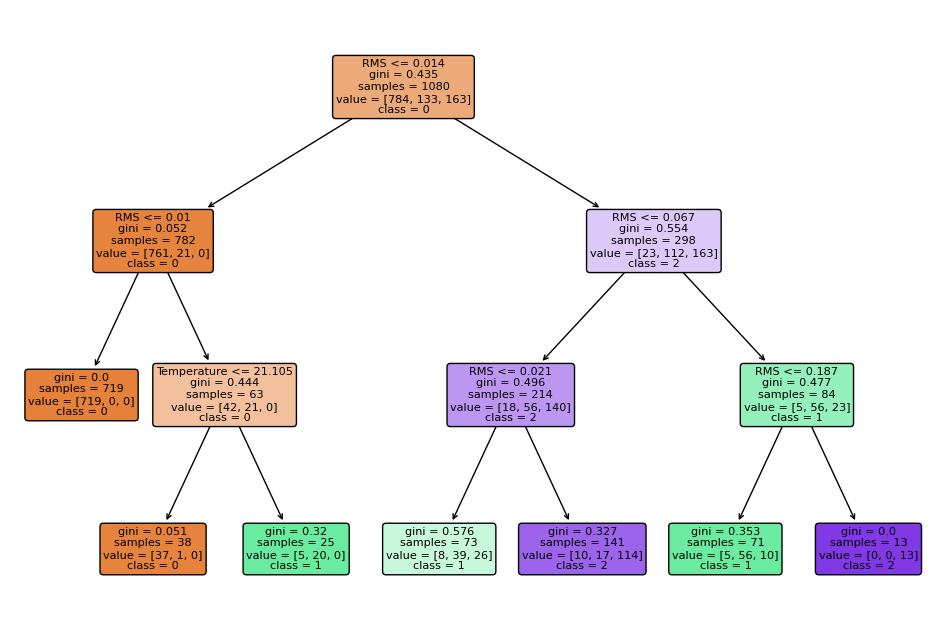

In [32]:
clf_s = DecisionTreeClassifier(max_depth=3)
clf_s = clf_s.fit(X_train_s, y_train_s)
print('source training accuracy:', clf_s.score(X_train_s, y_train_s))
print('source test accuracy:', clf_s.score(X_test_s, y_test_s))
y_pred = clf_s.predict(X_test_s)
cm = confusion_matrix(y_test_s, y_pred)
print("Confusion Matrix Target:")
print(cm)

plt.figure(figsize=(12, 8))
plot_tree(clf_s, feature_names=['co2', 'RMS', 'Occupancy', 'Power', 'Temperature', 'Door_Contact', 'Window_contact'], class_names=['0','1','2'], filled=True, rounded=True)
plt.show()

Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_s, y_train_s)
print('source test accuracy:', clf.score(X_test_s, y_test_s))
y_pred = clf.predict(X_test_s)
cm = confusion_matrix(y_test_s, y_pred)
print("Confusion Matrix Target:")
print(cm)


source test accuracy: 0.9638888888888889
Confusion Matrix Target:
[[256   3   2]
 [  1  40   3]
 [  1   3  51]]


Target

source training accuracy: 0.9528301886792453
source test accuracy: 0.8700623700623701
Confusion Matrix Target:
[[669  26   0]
 [ 36 135   2]
 [  4  57  33]]


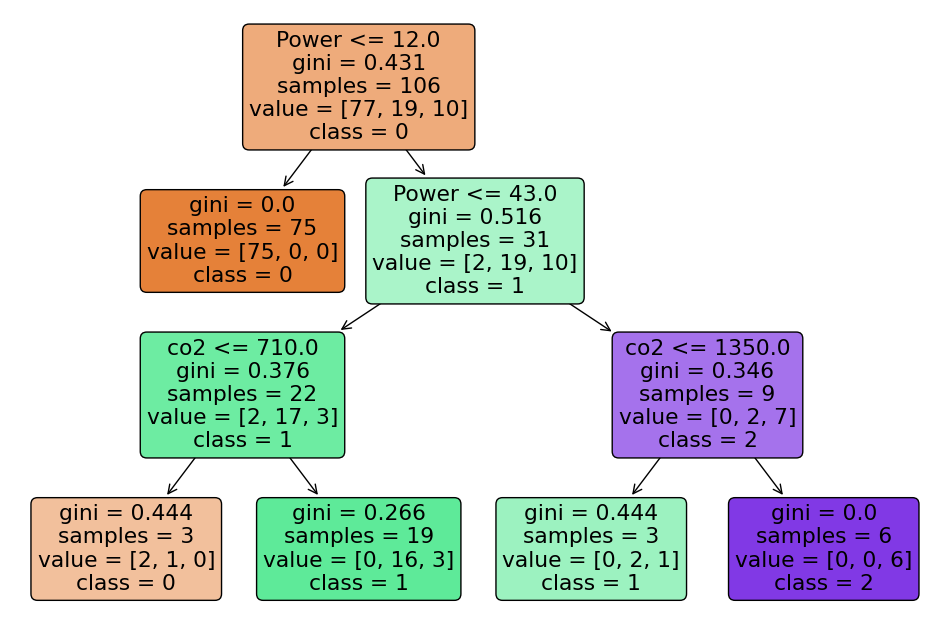

In [29]:
dtree_t = DecisionTreeClassifier(max_depth=3)
dtree_t = dtree_t.fit(X_train_t, y_train_t)
print('source training accuracy:', dtree_t.score(X_train_t, y_train_t))
print('source test accuracy:', dtree_t.score(X_test_t, y_test_t))
y_pred = dtree_t.predict(X_test_t)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix Target:")
print(cm)
plt.figure(figsize=(12, 8))
plot_tree(dtree_t, feature_names=['co2', 'RMS', 'Occupancy', 'Power', 'Temperature', 'Door_Contact', 'Window_contact'], class_names=['0','1','2'], filled=True, rounded=True)
plt.show()

In [31]:
clf = RandomForestClassifier()
clf.fit(X_train_t, y_train_t)
print('source test accuracy:', clf.score(X_test_t, y_test_t))
y_pred = clf.predict(X_test_t)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix Target:")
print(cm)


source test accuracy: 0.8586278586278586
Confusion Matrix Target:
[[662  32   1]
 [ 44 117  12]
 [  6  41  47]]


Simple TL

source test accuracy: 0.8316008316008316
Confusion Matrix Target:
[[680  15   0]
 [ 60 113   0]
 [  4  83   7]]


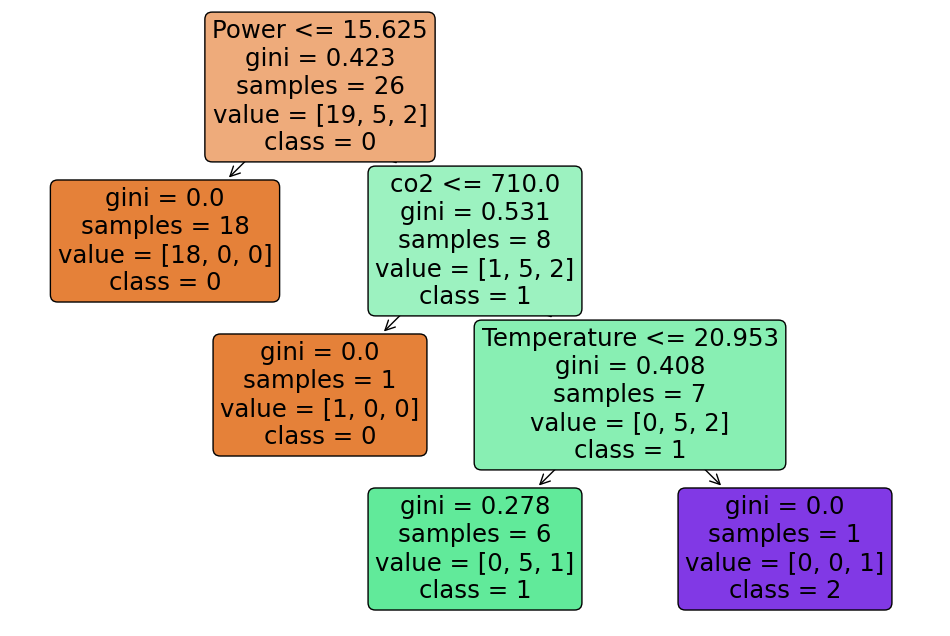

In [38]:
X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(X_train_t, y_train_t, test_size=0.75, stratify=y_train_t, random_state = 42)
dtree_source= copy.deepcopy(clf_s)
dtree_source.fit(X_train_target,y_train_target)
print('source test accuracy:', dtree_source.score(X_test_t, y_test_t))
y_pred = dtree_source.predict(X_test_t)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix Target:")
print(cm)
plt.figure(figsize=(12, 8))
plot_tree(dtree_source, feature_names=['co2', 'RMS', 'Occupancy', 'Power', 'Temperature', 'Door_Contact', 'Window_contact'], class_names=['0','1','2'], filled=True, rounded=True)
plt.show()